<a href="https://colab.research.google.com/github/CeleHub/UBER-PRICE-PREDICTION/blob/main/UBER_FARE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving uber.csv to uber.csv


In [5]:
uber = pd.read_csv('uber.csv')

In [6]:
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
# INSPECTING THE DATA
uber.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
# CHECKING THE DATATYPES
uber.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


 # WE NEED TO CONVERT PICKUP DATE-TIME TO DATE-TIME

In [9]:
# CHECKING THE NUMBER OF ROWS AND COLUMNS
uber.shape

(200000, 9)

In [10]:
# CHECKING THE STATICTICS
uber.describe(include = "all")

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


In [11]:
# CHECKING FOR MISSING VALUES
uber.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [12]:
#checking for duplcates
duplicates=uber.duplicated().sum()

In [13]:
print(duplicates)

0


In [14]:
#how to remove duplicate values
uber=uber.drop_duplicates()

In [15]:
#removing missing values
uber.dropna(inplace=True)

In [16]:
uber.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [17]:
uber.shape

(199999, 9)

In [18]:
#converting pickup_datetime from object to datetime
uber['pickup_datetime']=pd.to_datetime(uber['pickup_datetime'])

In [19]:
uber.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [20]:
uber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [21]:
#dropping unnecessary column
uber=uber.drop(columns=['Unnamed: 0', 'key'])

In [22]:
uber.shape

(199999, 7)

In [23]:
#Checking for correlation
corr=uber.corr()
corr

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.122765,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_datetime,0.122765,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398
pickup_longitude,0.010458,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<Axes: >

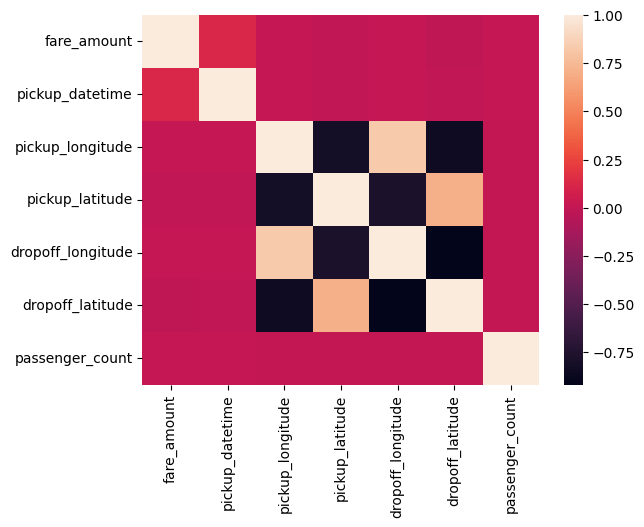

In [24]:
sns.heatmap(corr)

<Axes: >

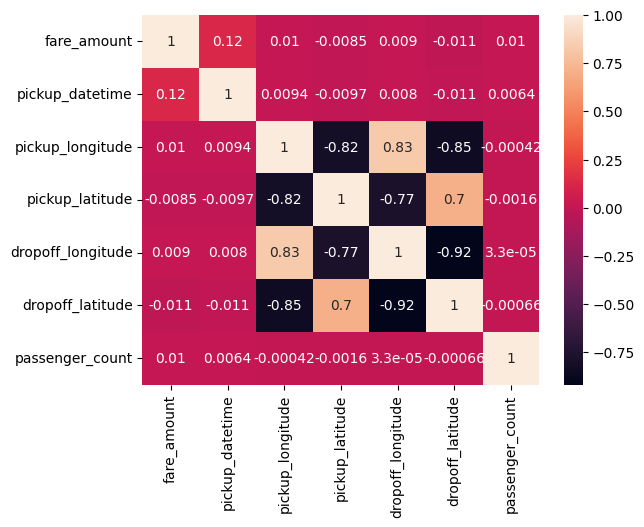

In [25]:
sns.heatmap(corr,annot=True)

In [26]:
#Checking for correlation
corr=uber.corr()
corr

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.122765,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_datetime,0.122765,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398
pickup_longitude,0.010458,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000


In [27]:
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [28]:
uber.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

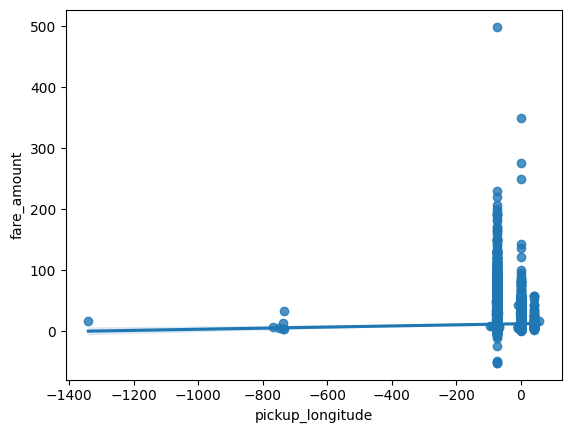

In [29]:
sns.regplot(x='pickup_longitude', y='fare_amount', data=uber)
plt.show()

In [30]:
#Scaling the data into similar ranges

from sklearn.preprocessing import StandardScaler

In [39]:
x=uber[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y=uber['fare_amount']

In [37]:
#Scaling the data into similar ranges

from sklearn.preprocessing import StandardScaler
#initialinzing
scaler=StandardScaler()
#scale the data
scaler_x=scaler.fit_transform(x)
scaler_x

array([[-0.1287125 ,  0.10393996, -0.11238682,  0.11763778, -0.49390163],
       [-0.12823496,  0.10262804, -0.11202076,  0.1216273 , -0.49390163],
       [-0.12916941,  0.10425293, -0.1095702 ,  0.12491245, -0.49390163],
       ...,
       [-0.12750598,  0.10628867, -0.10167167,  0.11313008,  0.22760356],
       [-0.12847703,  0.10226893, -0.11114447,  0.1135462 , -0.49390163],
       [-0.12736417,  0.10157268, -0.11131925,  0.12434525, -0.49390163]])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_x, y, test_size=0.2, random_state=0)

Model Building

In [50]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Initialize
LR=LinearRegression()

In [52]:
# Training the model
LR.fit(X_train,y_train)

LinearRegression()

In [58]:
# Prediction
LR_pred = lr.predict(X_test)
LR_pred

array([11.30215587, 11.3757867 , 11.30222264, ..., 11.30227655,
       11.30237551, 11.30265872])

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred

array([ 7.3, 18.5,  4.1, ..., 28.5, 19.7,  6.1])

Model Evaluation

In [68]:
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
# Linear Regression
LR_r2_score = r2_score(y_test, LR_pred)
LR_r2_score

0.00028689961071715064

In [72]:
dtr_r2_score = r2_score(y_test, dtr_pred)
dtr_r2_score

0.44102549547000813

In [75]:
# mean_squared_error
LR_mse = mean_squared_error(y_test, LR_pred)
LR_mse

101.16191156606037

In [76]:
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_mse

56.563157342768015